In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neuropacks import ECOG
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF

from pyuoi.decomposition import NMF as uNMF
%matplotlib inline

In [3]:
data_path = '/Users/psachdeva/data/ECoG/data/r32_b7.mat'
grid_path = '/Users/psachdeva/data/ECoG/data/grdid.mat'
ecog = ECOG(
    data_path=data_path,
    grid_path=grid_path
)

In [5]:
#dead_indices = [19, 21, 0]
Y = ecog.get_response_matrix(
    bounds=(40, 60),
    band='HG'
)
#Y = np.delete(Y, dead_indices, axis=1)

In [6]:
Y[Y < 0] = 0

In [25]:
nmf = NMF(n_components=16, solver='mu', max_iter=500)
nmf.fit(Y)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=500,
  n_components=16, random_state=None, shuffle=False, solver='mu',
  tol=0.0001, verbose=0)

In [22]:
uoi = uNMF(
    n_boots=20,
    ranks=[20],
    dbscan=DBSCAN(min_samples=10),
    nmf=NMF(beta_loss='kullback-leibler', solver='mu', max_iter=1000, init='random'),
    cons_meth=np.median
)

In [23]:
uoi.fit(Y)

NMF(cons_meth=<function median at 0x10a7c2b70>,
  dbscan=DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None),
  n_boots=20,
  nmf=NMF(alpha=0.0, beta_loss='kullback-leibler', init='random', l1_ratio=0.0,
  max_iter=1000, n_components=20, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0),
  nnreg=<function NMF.__initialize.<locals>.<lambda> at 0x109800e18>,
  random_state=None, ranks=(20,))

In [24]:
uoi.components_.shape

(16, 128)

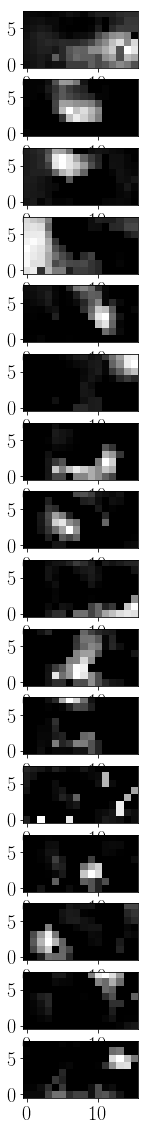

In [26]:
fig, axes = plt.subplots(nmf.components_.shape[0], 1, figsize=(5, 20))

for component in range(nmf.components_.shape[0]):
    grid = np.zeros((8, 16))
    for index in range(ecog.n_electrodes):
        x, y = ecog.get_xy_for_electrode(index)
        grid[x, y] = nmf.components_[component, index]

    axes[component].imshow(grid)

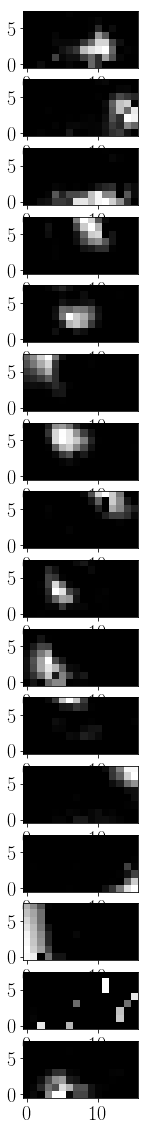

In [27]:
fig, axes = plt.subplots(uoi.components_.shape[0], 1, figsize=(5, 20))

for component in range(uoi.components_.shape[0]):
    grid = np.zeros((8, 16))
    for index in range(ecog.n_electrodes):
        x, y = ecog.get_xy_for_electrode(index)
        grid[x, y] = uoi.components_[component, index]

    axes[component].imshow(grid)

In [39]:
Y[:, 1]

array([ 1.34007628,  0.86876943, -0.27202906, ...,  6.38571013,
        0.3464968 ,  1.49454113])

In [47]:
128/8

16.0